<a href="https://colab.research.google.com/github/TheophilusG/Fintech/blob/main/Tiktok_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('/content/tiktok_dataset.csv')

# Preprocessing
df['claim_status'] = df['claim_status'].map({'claim': 1, 'opinion': 0})  # Assuming 'claim' and 'opinion' are the labels

# Handle missing values in 'video_transcription_text' column
# Replace NaN values with empty strings
df['video_transcription_text'] = df['video_transcription_text'].fillna('')

# ***Handle missing values in 'claim_status' column (target variable)***
# ***You can either drop rows with missing values or impute them.***
# ***Here, we'll drop rows with missing values in 'claim_status':***
df.dropna(subset=['claim_status'], inplace=True)

# Text Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(df['video_transcription_text'])

# Combine text features with other numerical features
X_other = df[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
X = pd.concat([pd.DataFrame(X_text.toarray()), X_other.reset_index(drop=True)], axis=1)
# Convert all column names to strings
X.columns = X.columns.astype(str)  # This line is added to fix the error
y = df['claim_status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9997380141472361
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1889
         1.0       1.00      1.00      1.00      1928

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



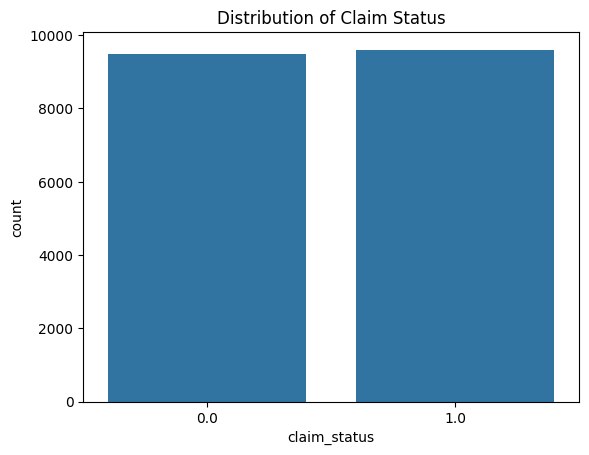

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of claim_status
sns.countplot(x='claim_status', data=df)
plt.title('Distribution of Claim Status')
plt.show()

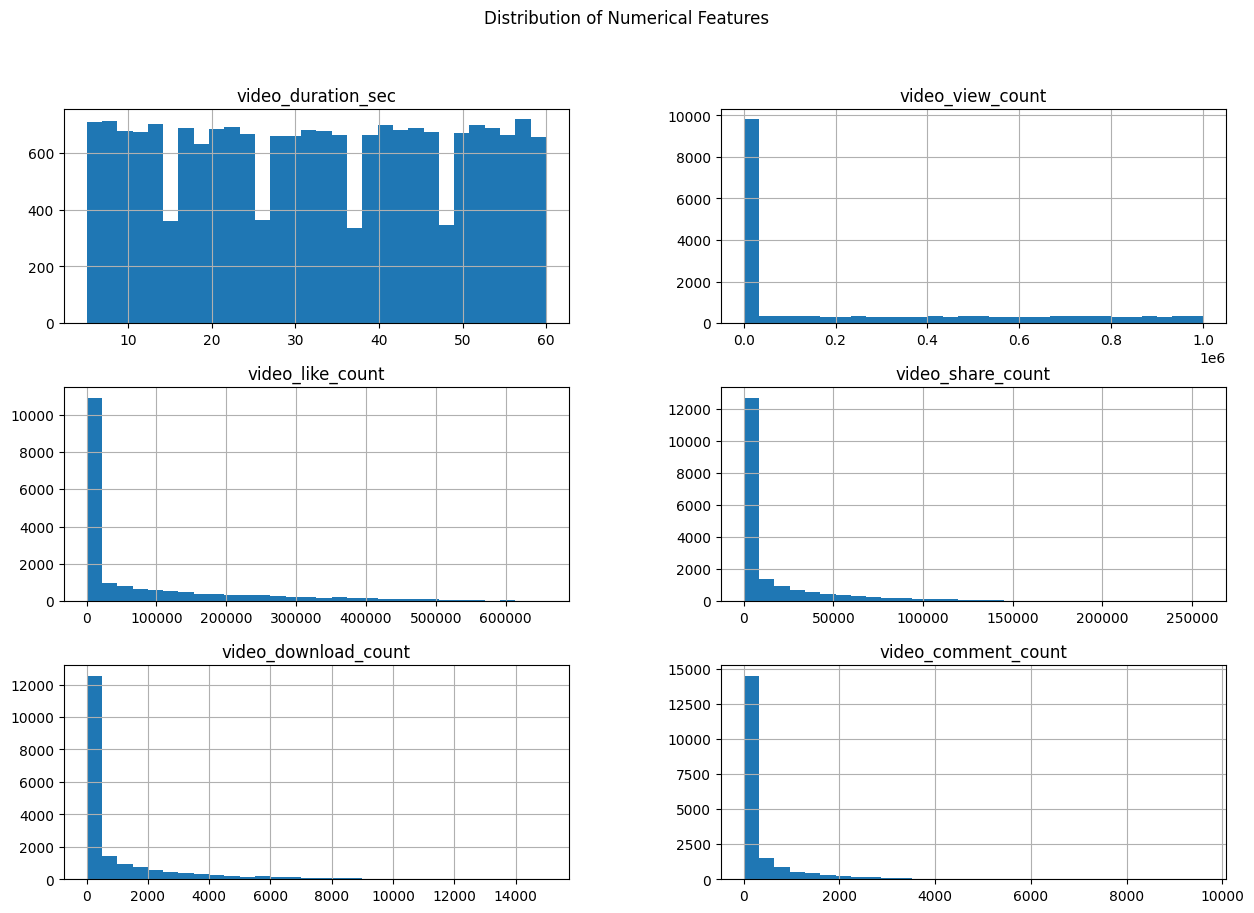

In [8]:
# Plot histograms for numerical features
numerical_features = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

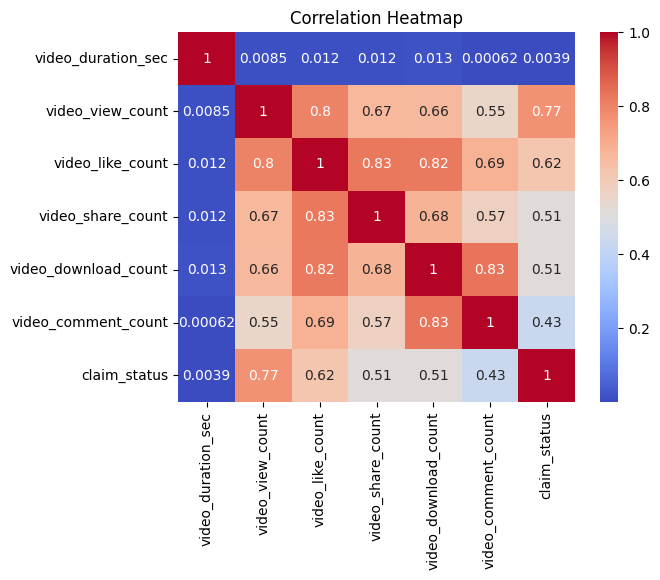

In [9]:
# Correlation heatmap
corr = df[numerical_features + ['claim_status']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

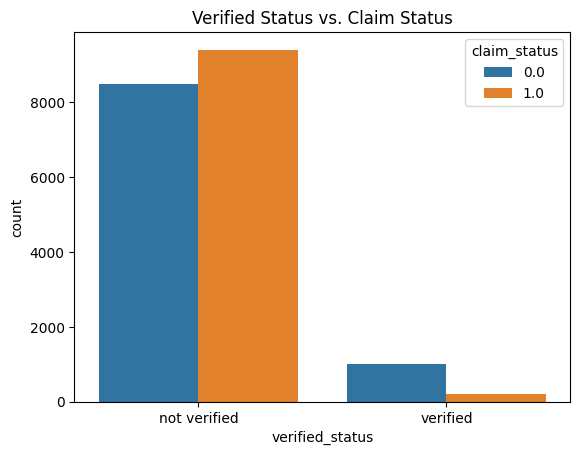

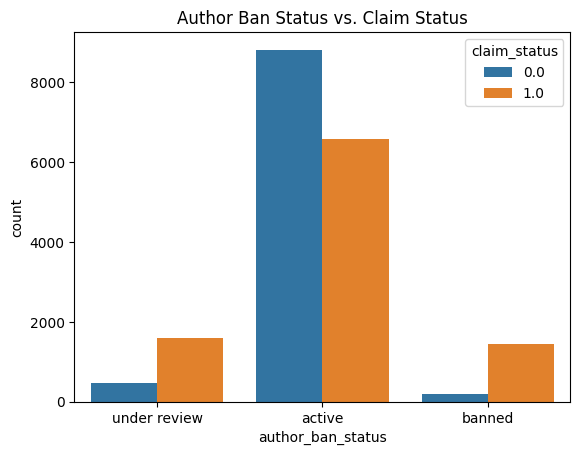

In [10]:
# Distribution of verified_status
sns.countplot(x='verified_status', hue='claim_status', data=df)
plt.title('Verified Status vs. Claim Status')
plt.show()

# Distribution of author_ban_status
sns.countplot(x='author_ban_status', hue='claim_status', data=df)
plt.title('Author Ban Status vs. Claim Status')
plt.show()

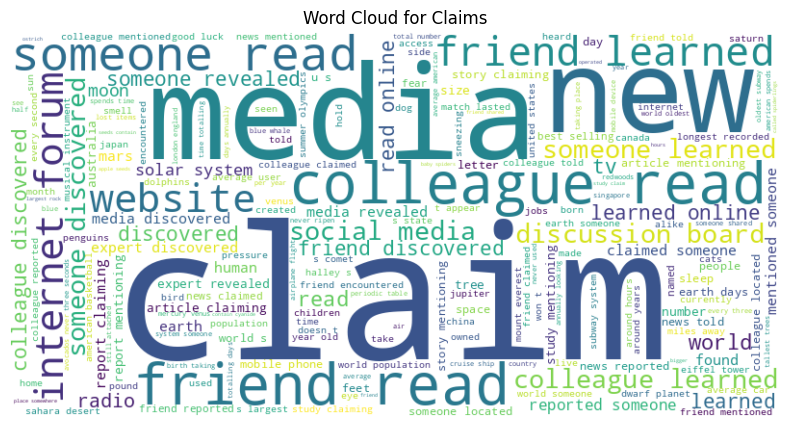

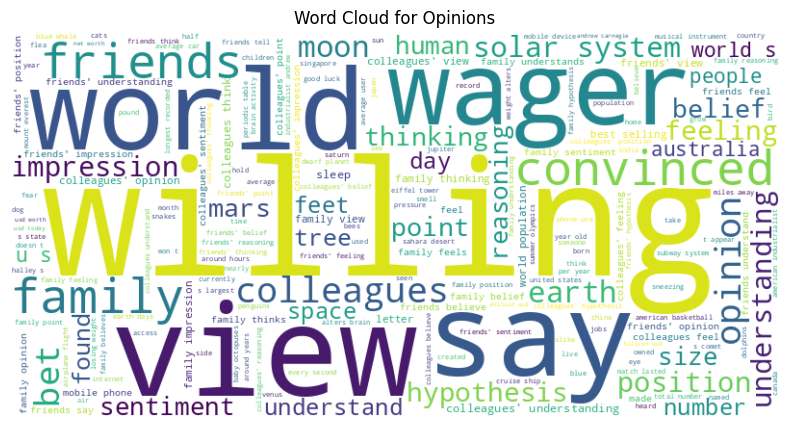

In [11]:
from wordcloud import WordCloud

# Word cloud for claims
claim_text = " ".join(df[df['claim_status'] == 1]['video_transcription_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(claim_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Claims')
plt.show()

# Word cloud for opinions
opinion_text = " ".join(df[df['claim_status'] == 0]['video_transcription_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opinion_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Opinions')
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['video_transcription_text'])

In [14]:
df['like_to_view_ratio'] = df['video_like_count'] / df['video_view_count']
df['share_to_view_ratio'] = df['video_share_count'] / df['video_view_count']
df['comment_to_view_ratio'] = df['video_comment_count'] / df['video_view_count']

In [15]:
df = pd.get_dummies(df, columns=['verified_status', 'author_ban_status'], drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split

# Combine text features with other features
X = pd.concat([pd.DataFrame(X_text.toarray()), df[numerical_features + ['like_to_view_ratio', 'share_to_view_ratio', 'comment_to_view_ratio']]], axis=1)
y = df['claim_status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import xgboost as xgb

# Train XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1889
         1.0       1.00      1.00      1.00      1928

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

ROC-AUC Score: 0.9992219917012448


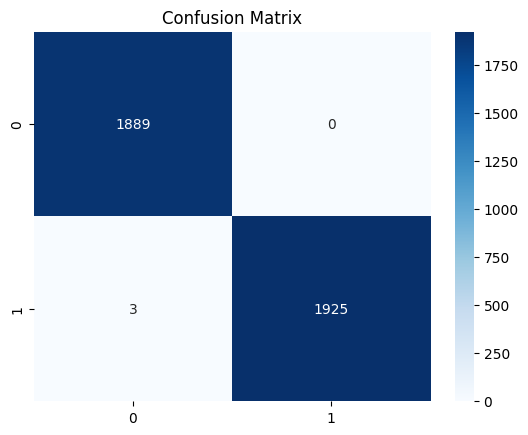

In [18]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


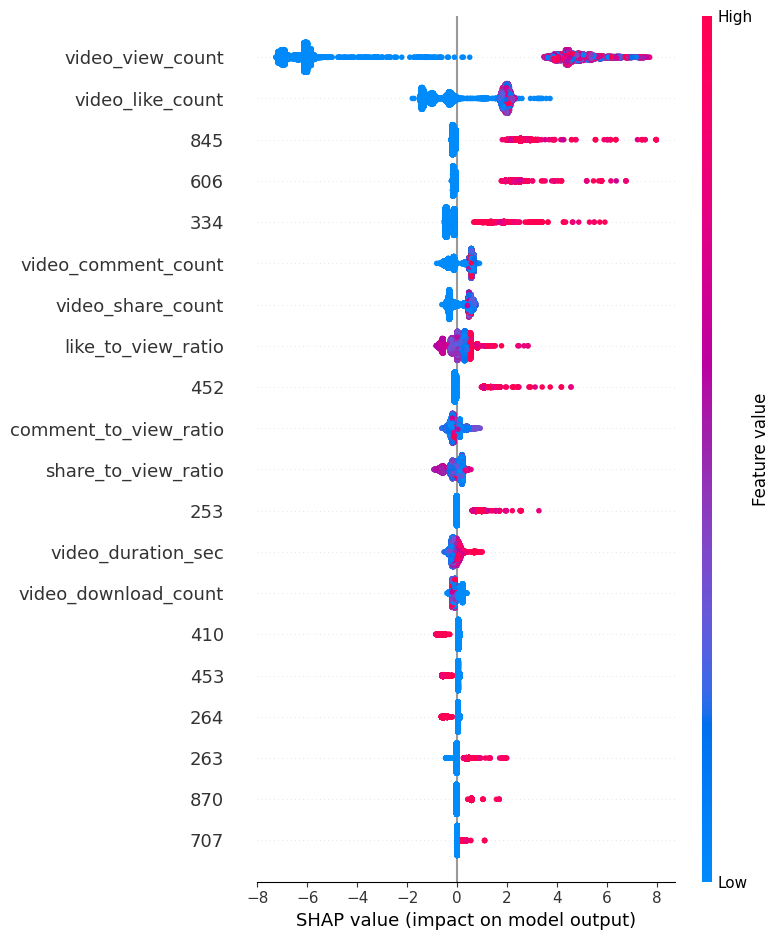

In [20]:
import shap

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP summary plot
shap.summary_plot(shap_values, X_train)

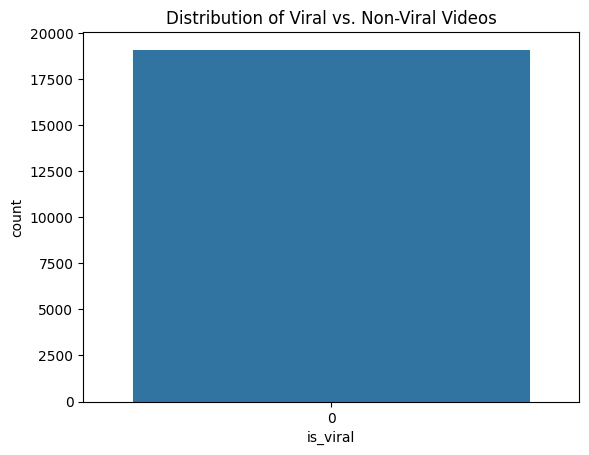

In [21]:
# Define virality threshold
VIRAL_THRESHOLD = 1000000  # 1 million views

# Create target variable
df['is_viral'] = (df['video_view_count'] > VIRAL_THRESHOLD).astype(int)

# Check distribution of viral vs. non-viral videos
sns.countplot(x='is_viral', data=df)
plt.title('Distribution of Viral vs. Non-Viral Videos')
plt.show()

In [23]:
# Create engagement ratios
import numpy as np

df['like_to_view_ratio'] = df['video_like_count'] / df['video_view_count']
df['share_to_view_ratio'] = df['video_share_count'] / df['video_view_count']
df['comment_to_view_ratio'] = df['video_comment_count'] / df['video_view_count']
df['download_to_view_ratio'] = df['video_download_count'] / df['video_view_count']

# Handle division by zero (if any)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['video_transcription_text'])

In [27]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['verified_status', 'author_ban_status'], drop_first=True)

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'like_to_view_ratio', 'share_to_view_ratio', 'comment_to_view_ratio',
       'verified_status_verified', 'author_ban_status_banned',
       'author_ban_status_under review', 'is_viral', 'download_to_view_ratio'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Combine text features with other features
X = pd.concat([pd.DataFrame(X_text.toarray()), df[['video_duration_sec', 'like_to_view_ratio', 'share_to_view_ratio', 'comment_to_view_ratio', 'download_to_view_ratio']]], axis=1)
y = df['is_viral']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

In [ ]:
import xgboost as xgb

# Train XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

In [ ]:
# Feature importance for XGBoost
feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features for Predicting Virality')
plt.show()

In [ ]:
import shap

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP summary plot
shap.summary_plot(shap_values, X_train)